<a href="https://colab.research.google.com/github/sambhav3009/Diabetes-Prediction-Web-Application/blob/main/diabetes_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset
# Note: Replace with your actual dataset path
# You can download from: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Basic dataset information
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

DATASET OVERVIEW
Dataset Shape: (100000, 9)
Number of rows: 100000
Number of columns: 9


In [ ]:
print("\nColoumn names and Datatypes:")
print(df.dtypes)


Coloumn names and Datatypes:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
print("="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")

DATA QUALITY ASSESSMENT
Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Total missing values: 0


In [ ]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 3854


In [ ]:
# Remove duplicates if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"After removing duplicates: {df.shape}")

After removing duplicates: (96146, 9)


In [ ]:
# Examine unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
# Check target variable distribution
print(f"\nTarget Variable Distribution:")
print(df['diabetes'].value_counts())


Target Variable Distribution:
diabetes
0    87664
1     8482
Name: count, dtype: int64


In [ ]:
print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)
# Statistical summary
print("Statistical Summary:")
print(df.describe())

EXPLORATORY DATA ANALYSIS
Statistical Summary:
                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             1

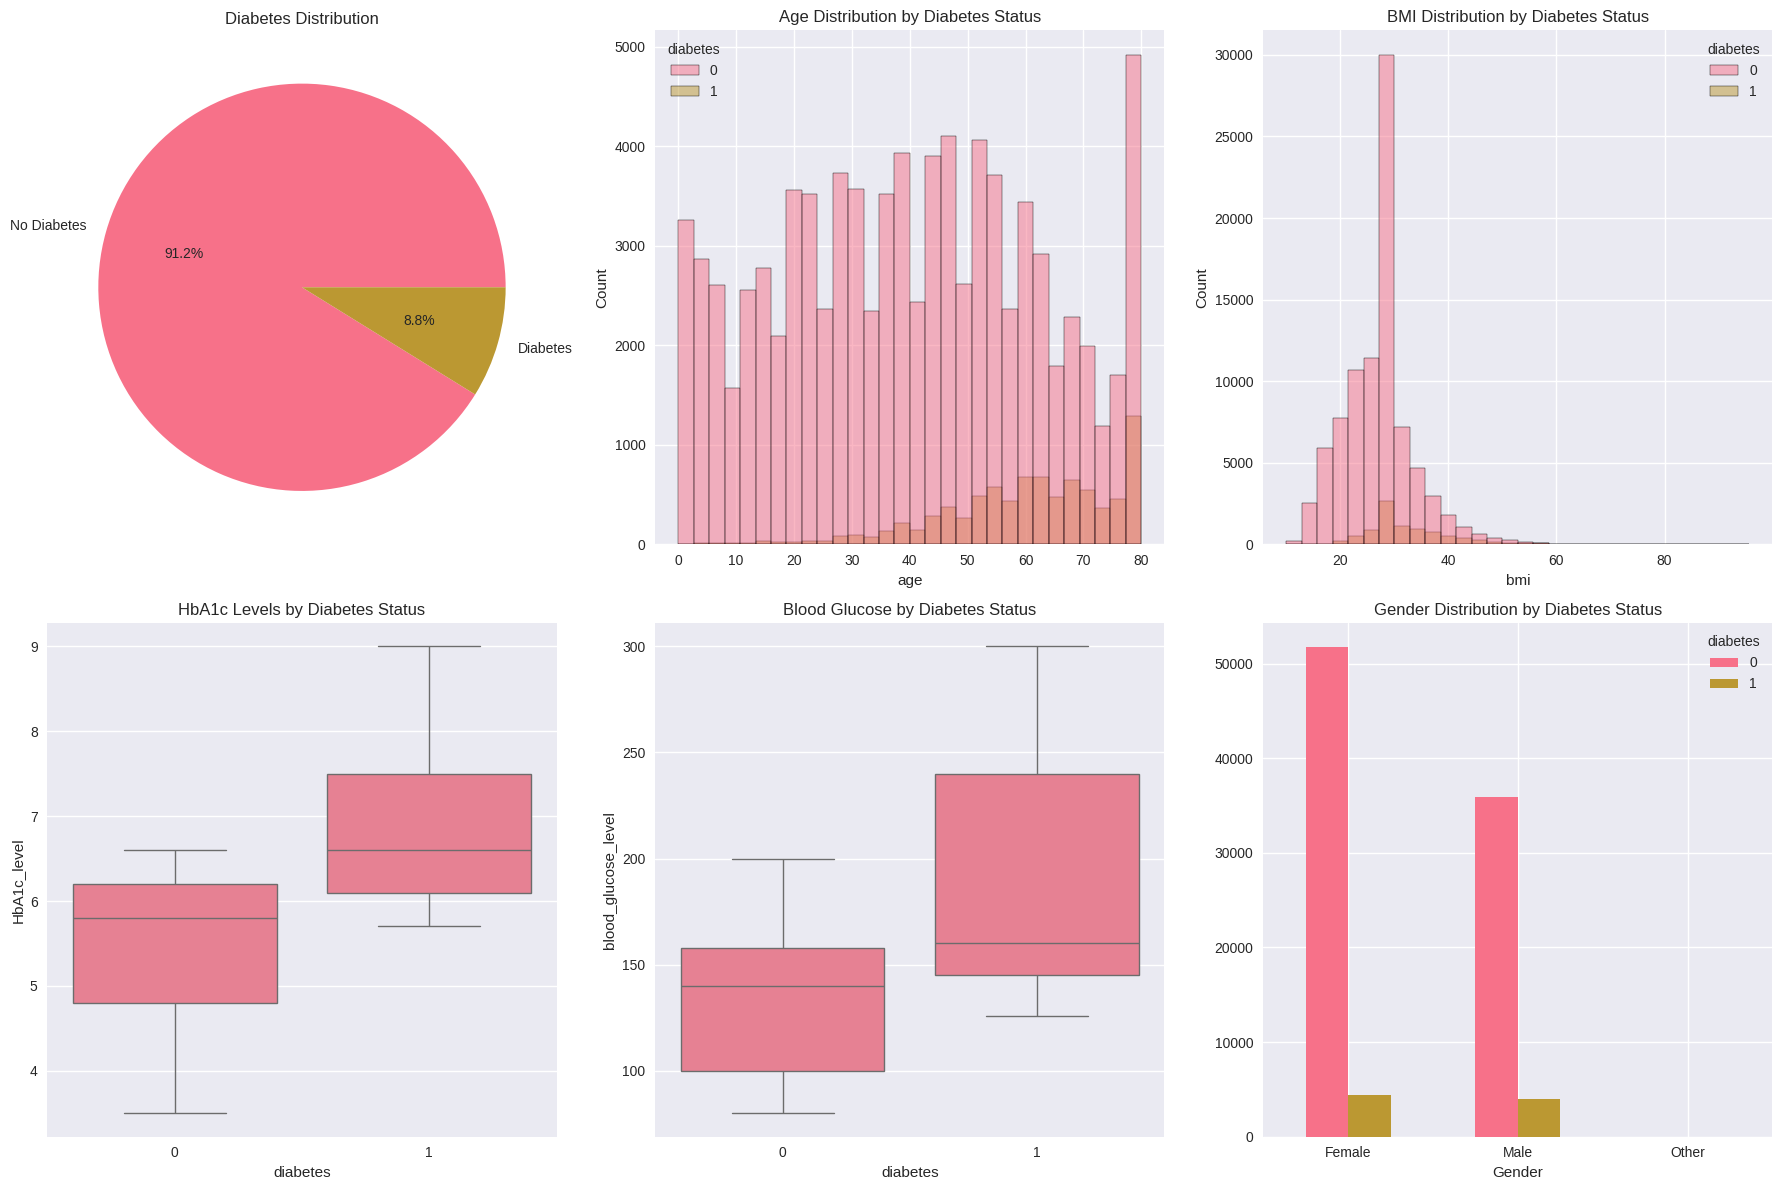

In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Target distribution
axes[0, 0].pie(df['diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
axes[0, 0].set_title('Diabetes Distribution')

# Age distribution by diabetes
sns.histplot(data=df, x='age', hue='diabetes', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Diabetes Status')

# BMI distribution by diabetes
sns.histplot(data=df, x='bmi', hue='diabetes', bins=30, ax=axes[0, 2])
axes[0, 2].set_title('BMI Distribution by Diabetes Status')

# HbA1c levels
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Levels by Diabetes Status')

# Blood glucose levels
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose by Diabetes Status')


# Gender distribution
gender_diabetes = df.groupby(['gender', 'diabetes']).size().unstack()
gender_diabetes.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Gender Distribution by Diabetes Status')
axes[1, 2].set_xlabel('Gender')
axes[1, 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Correlation analysis
print("\nCorrelation Analysis:")
# Convert categorical to numeric for correlation
df_corr = df.copy()


Correlation Analysis:


In [ ]:
# Encode categorical variables for correlation
le_gender = LabelEncoder()
df_corr['gender_encoded'] = le_gender.fit_transform(df_corr['gender'])

le_smoking = LabelEncoder()
df_corr['smoking_encoded'] = le_smoking.fit_transform(df_corr['smoking_history'])

In [ ]:
df_corr.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,4
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,1
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1


In [ ]:
# Select numeric columns for correlation
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
                'hypertension', 'heart_disease', 'gender_encoded', 'smoking_encoded', 'diabetes']

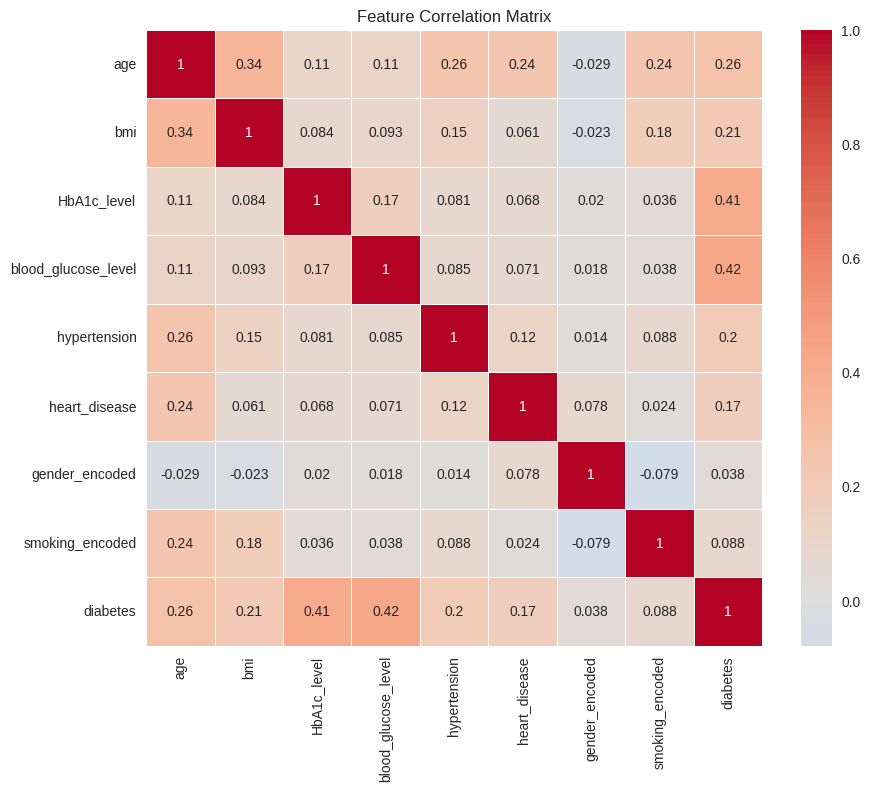

In [ ]:
correlation_matrix = df_corr[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
print("="*50)
print("DATA PREPROCESSING")
print("="*50)
# Handle any missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Check and handle missing values
if df[numeric_columns].isnull().any().any():
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    print("Missing values imputed with mean")
else:
    print("No missing values found in numeric columns")




DATA PREPROCESSING
No missing values found in numeric columns


In [ ]:
# Handle categorical variables
print("\nEncoding categorical variables...")

# Create a copy for preprocessing
df_processed = df.copy()


Encoding categorical variables...


In [ ]:
df_processed.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# 1. Gender encoding (One-hot encoding)
gender_dummies = pd.get_dummies(df_processed['gender'], prefix='gender', drop_first=True)
df_processed = pd.concat([df_processed, gender_dummies], axis=1)
df_processed.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,True,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,False


In [ ]:
# 2. Smoking history encoding (Ordinal encoding based on risk level)
smoking_mapping = {
    'never': 0,
    'No Info': 0,
    'former': 1,
    'not current': 1,
    'current': 2,
    'ever': 1
}
df_processed['smoking_history_encoded'] = df_processed['smoking_history'].map(smoking_mapping)
df_processed.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,True,False,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False,2
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,False,2


In [ ]:
df_processed.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,True,False,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False,2
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,False,2


In [ ]:
# Remove original categorical columns
df_processed = df_processed.drop(['gender', 'smoking_history'], axis=1)

print("\nCategorical encoding completed.")
print(f"Dataset shape after encoding: {df_processed.shape}")
print("New columns:", df_processed.columns.tolist())


Categorical encoding completed.
Dataset shape after encoding: (96146, 10)
New columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_encoded']


In [ ]:
df_processed.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,False,False,0
1,54.0,0,0,27.32,6.6,80,0,False,False,0
2,28.0,0,0,27.32,5.7,158,0,True,False,0
3,36.0,0,0,23.45,5.0,155,0,False,False,2
4,76.0,1,1,20.14,4.8,155,0,True,False,2


In [ ]:
# ==============================================================================
# TRAIN-TEST SPLIT AND SCALING
# ==============================================================================
print("\n" + "="*50)
print("TRAIN-TEST SPLIT AND SCALING")
print("="*50)



TRAIN-TEST SPLIT AND SCALING


In [ ]:
# Separate features (X) and target (y) from the processed dataframe
X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (96146, 9)
Target shape: (96146,)


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")



Train set size: 76916, Test set size: 19230


In [ ]:
# Feature scaling
scaler = StandardScaler()
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply scaling to the train and test sets
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [ ]:
import joblib  # Import joblib for saving models
# Save the scaler object for future use (e.g., in deployment)
joblib.dump(scaler, 'scaler.joblib')
print("\nFeature scaling completed and scaler saved as 'scaler.joblib'.")



Feature scaling completed and scaler saved as 'scaler.joblib'.


In [ ]:
# ==============================================================================
# MODEL TRAINING, EVALUATION, AND SAVING
# ==============================================================================
print("\n" + "="*50)
print("MODEL TRAINING, EVALUATION, AND SAVING")
print("="*50)

# Initialize the 4 classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}



MODEL TRAINING, EVALUATION, AND SAVING


In [ ]:
# Store results
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Train model
    model.fit(X_train, y_train)

    # Save the trained model
    model_filename = f'{name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Model saved as '{model_filename}'")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    results[name] = {'accuracy': accuracy, 'auc': auc_score}

    print(f"{name} -> Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

    # Detailed classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

print("\n" + "="*50)
print("All models trained, evaluated, and saved successfully!")
print("="*50)

# Display final results summary
results_df = pd.DataFrame(results).T.sort_values(by='auc', ascending=False)
print("\nModel Performance Summary:")
print(results_df)


--- Training Logistic Regression ---
Model saved as 'logistic_regression_model.joblib'
Logistic Regression -> Accuracy: 0.9590, AUC: 0.9598

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.87      0.63      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230


--- Training Random Forest ---
Model saved as 'random_forest_model.joblib'
Random Forest -> Accuracy: 0.9686, AUC: 0.9592

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.93      0.69      0.80      1696

    accuracy                           0.97     19230
   macro avg       0.95      0.84      0.89     19230
weighted avg       0.97      0.97      0.97    